In [2]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке,
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
#
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию,
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными,
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [3]:
# Данный блок в области 1 НЕ выполняется преподавателем
#
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
#
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
#
# pip install scikit-optimize

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.plotting as pd_plt
import pickle

from sklearn.experimental import enable_halving_search_cv

from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    RepeatedStratifiedKFold,
    StratifiedShuffleSplit,
    StratifiedKFold,
    KFold,
    cross_val_score,
    HalvingGridSearchCV,
    FixedThresholdClassifier,
)
from sklearn.metrics import (
    classification_report,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    RocCurveDisplay,
    DetCurveDisplay,
    accuracy_score,
    mean_squared_error,
    fbeta_score,
    make_scorer,
    log_loss,
)
from sklearn.preprocessing import (
    MinMaxScaler,
    StandardScaler,
    RobustScaler,
    Normalizer,
    OneHotEncoder,
    OrdinalEncoder,
    PolynomialFeatures,
    KBinsDiscretizer,
    FunctionTransformer,
)
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.feature_selection import SelectPercentile, RFE

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    VotingClassifier,
    StackingClassifier,
)
from skopt import BayesSearchCV
from skopt.space import Integer, Categorical, Real
from sklearn.metrics import precision_recall_curve, fbeta_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import TunedThresholdClassifierCV

### Область работы 2 (поиск  модели .... )

In [5]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели
# должен быть понятен и очевиден отбор параметров модели
#
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
#

path_train = "train.csv"  # содержит только имя файла, без имен папок !!!

In [6]:
df = pd.read_csv(path_train)
df

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0.0,1.0,23.0,1.0,0.0,1.0,1.0,1.0,0.0,...,1.0,0.0,4.0,5.0,2.0,0.0,0.0,6.0,6.0,3.0
1,1.0,1.0,1.0,35.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,15.0,15.0,0.0,0.0,10.0,4.0,5.0
2,1.0,0.0,1.0,30.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,3.0,30.0,30.0,0.0,0.0,4.0,5.0,1.0
3,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,6.0,7.0
4,0.0,0.0,1.0,36.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,3.0,0.0,2.0,0.0,0.0,5.0,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47358,1.0,1.0,1.0,27.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,13.0,5.0,6.0
47359,0.0,1.0,1.0,31.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,2.0,0.0,1.0,0.0,1.0,9.0,6.0,8.0
47360,1.0,0.0,1.0,28.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,5.0,20.0,0.0,0.0,9.0,4.0,6.0
47361,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,1.0,0.0,0.0,5.0,6.0,8.0


In [7]:
display(df.describe(), df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47363 entries, 0 to 47362
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HighBP                47363 non-null  float64
 1   HighChol              47363 non-null  float64
 2   CholCheck             47363 non-null  float64
 3   BMI                   47363 non-null  float64
 4   Smoker                47363 non-null  float64
 5   Stroke                47363 non-null  float64
 6   HeartDiseaseorAttack  47363 non-null  float64
 7   PhysActivity          47363 non-null  float64
 8   Fruits                47363 non-null  float64
 9   Veggies               47363 non-null  float64
 10  HvyAlcoholConsump     47363 non-null  float64
 11  AnyHealthcare         47363 non-null  float64
 12  NoDocbcCost           47363 non-null  float64
 13  GenHlth               47363 non-null  float64
 14  MentHlth              47363 non-null  float64
 15  PhysHlth           

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,47363.000000,47363.000000,47363.000000,47363.000000,47363.000000,47363.000000,47363.000000,47363.000000,47363.000000,47363.000000,...,47363.000000,47363.000000,47363.000000,47363.000000,47363.000000,47363.000000,47363.000000,47363.000000,47363.000000,47363.000000
mean,0.563879,0.523468,0.975741,29.862551,0.475118,0.062834,0.148766,0.701940,0.610814,0.788844,...,0.954585,0.094145,2.835272,3.732829,5.788105,0.252349,0.457213,8.587294,4.923485,5.703292
std,0.495908,0.499454,0.153855,7.144498,0.499386,0.242666,0.355861,0.457411,0.487571,0.408133,...,0.208215,0.292034,1.112528,8.145554,10.044184,0.434365,0.498171,2.847747,1.027849,2.174629
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,5.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


None

In [8]:
display(df[df.duplicated()], df[df.isna().any(axis=1)])

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
882,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0
1440,0.0,0.0,1.0,23.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,6.0,8.0
2023,0.0,0.0,1.0,22.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,7.0,6.0,8.0
2239,1.0,1.0,1.0,31.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,12.0,5.0,7.0
2412,1.0,1.0,1.0,37.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,7.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47288,0.0,1.0,1.0,32.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,10.0,6.0,8.0
47310,0.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0
47319,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,5.0,6.0,8.0
47344,1.0,0.0,1.0,23.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,10.0,6.0,8.0


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income


In [9]:
y = pd.read_csv("train_Y.csv")

In [12]:
df_train = pd.merge(df, y, left_index=True, right_index=True)
df_train.drop_duplicates(inplace=True)

In [21]:
X = df_train.drop("Diabetes_binary", axis=1)
y = df_train["Diabetes_binary"]

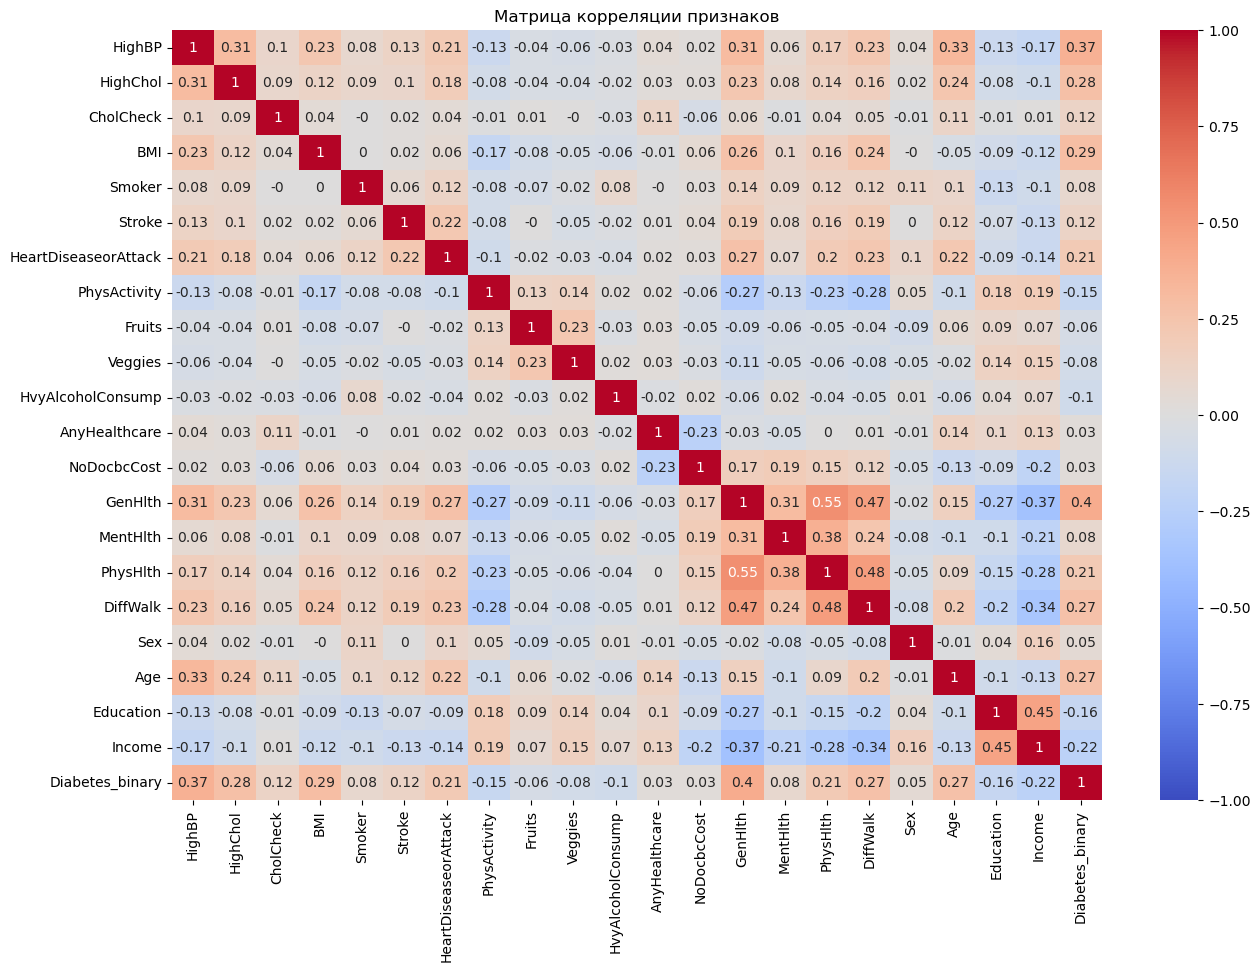

In [24]:
plt.figure(figsize=(15, 10))
sns.heatmap(round(df_train.corr(), 2), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Матрица корреляции признаков")
plt.show()

На самом деле видно, что есть некая корреляция между признаками, но попробуем рассмотреть этот вопрос более глубинно

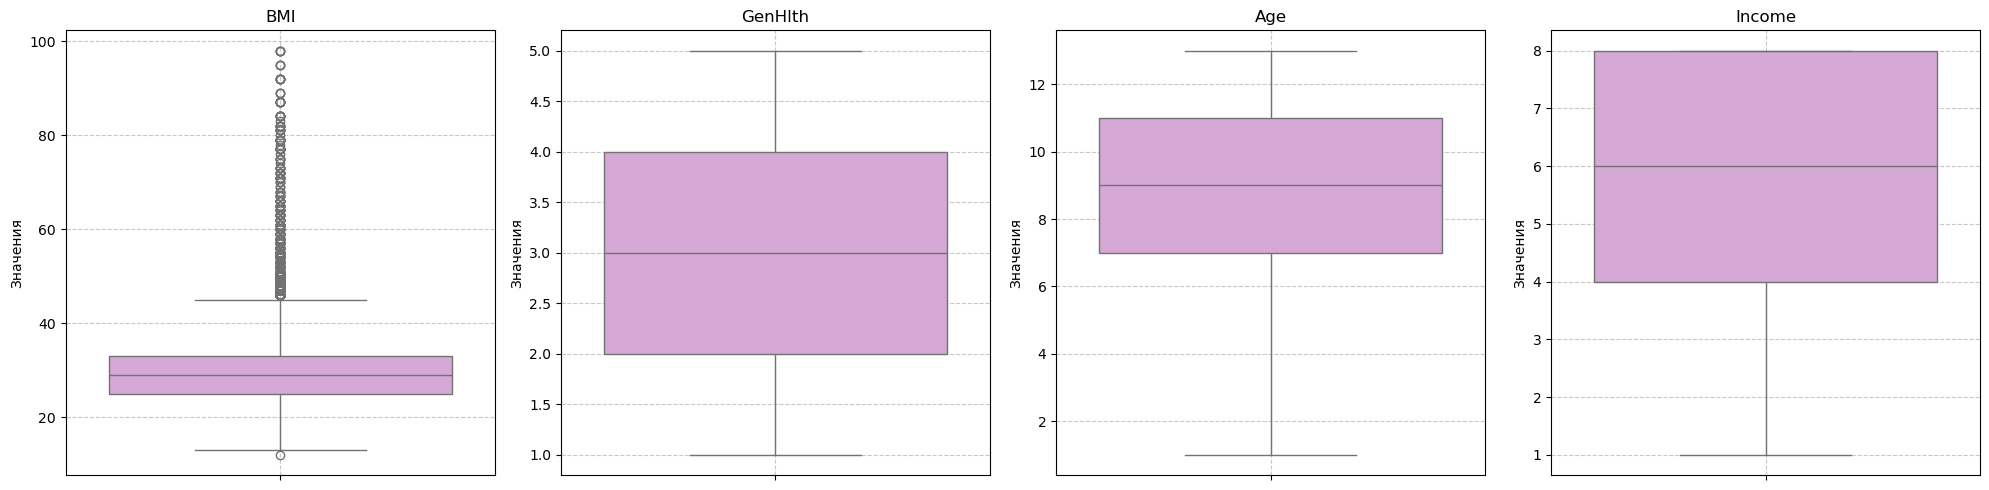

In [19]:
columns_to_plot = ["BMI", "GenHlth", "Age", "Income"]

plt.figure(figsize=(len(columns_to_plot) * 5, 5))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(1, len(columns_to_plot), i)
    sns.boxplot(y=df_train[column], color="plum")
    plt.title(f"{column}")
    plt.ylabel("Значения")
    plt.grid(True, linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

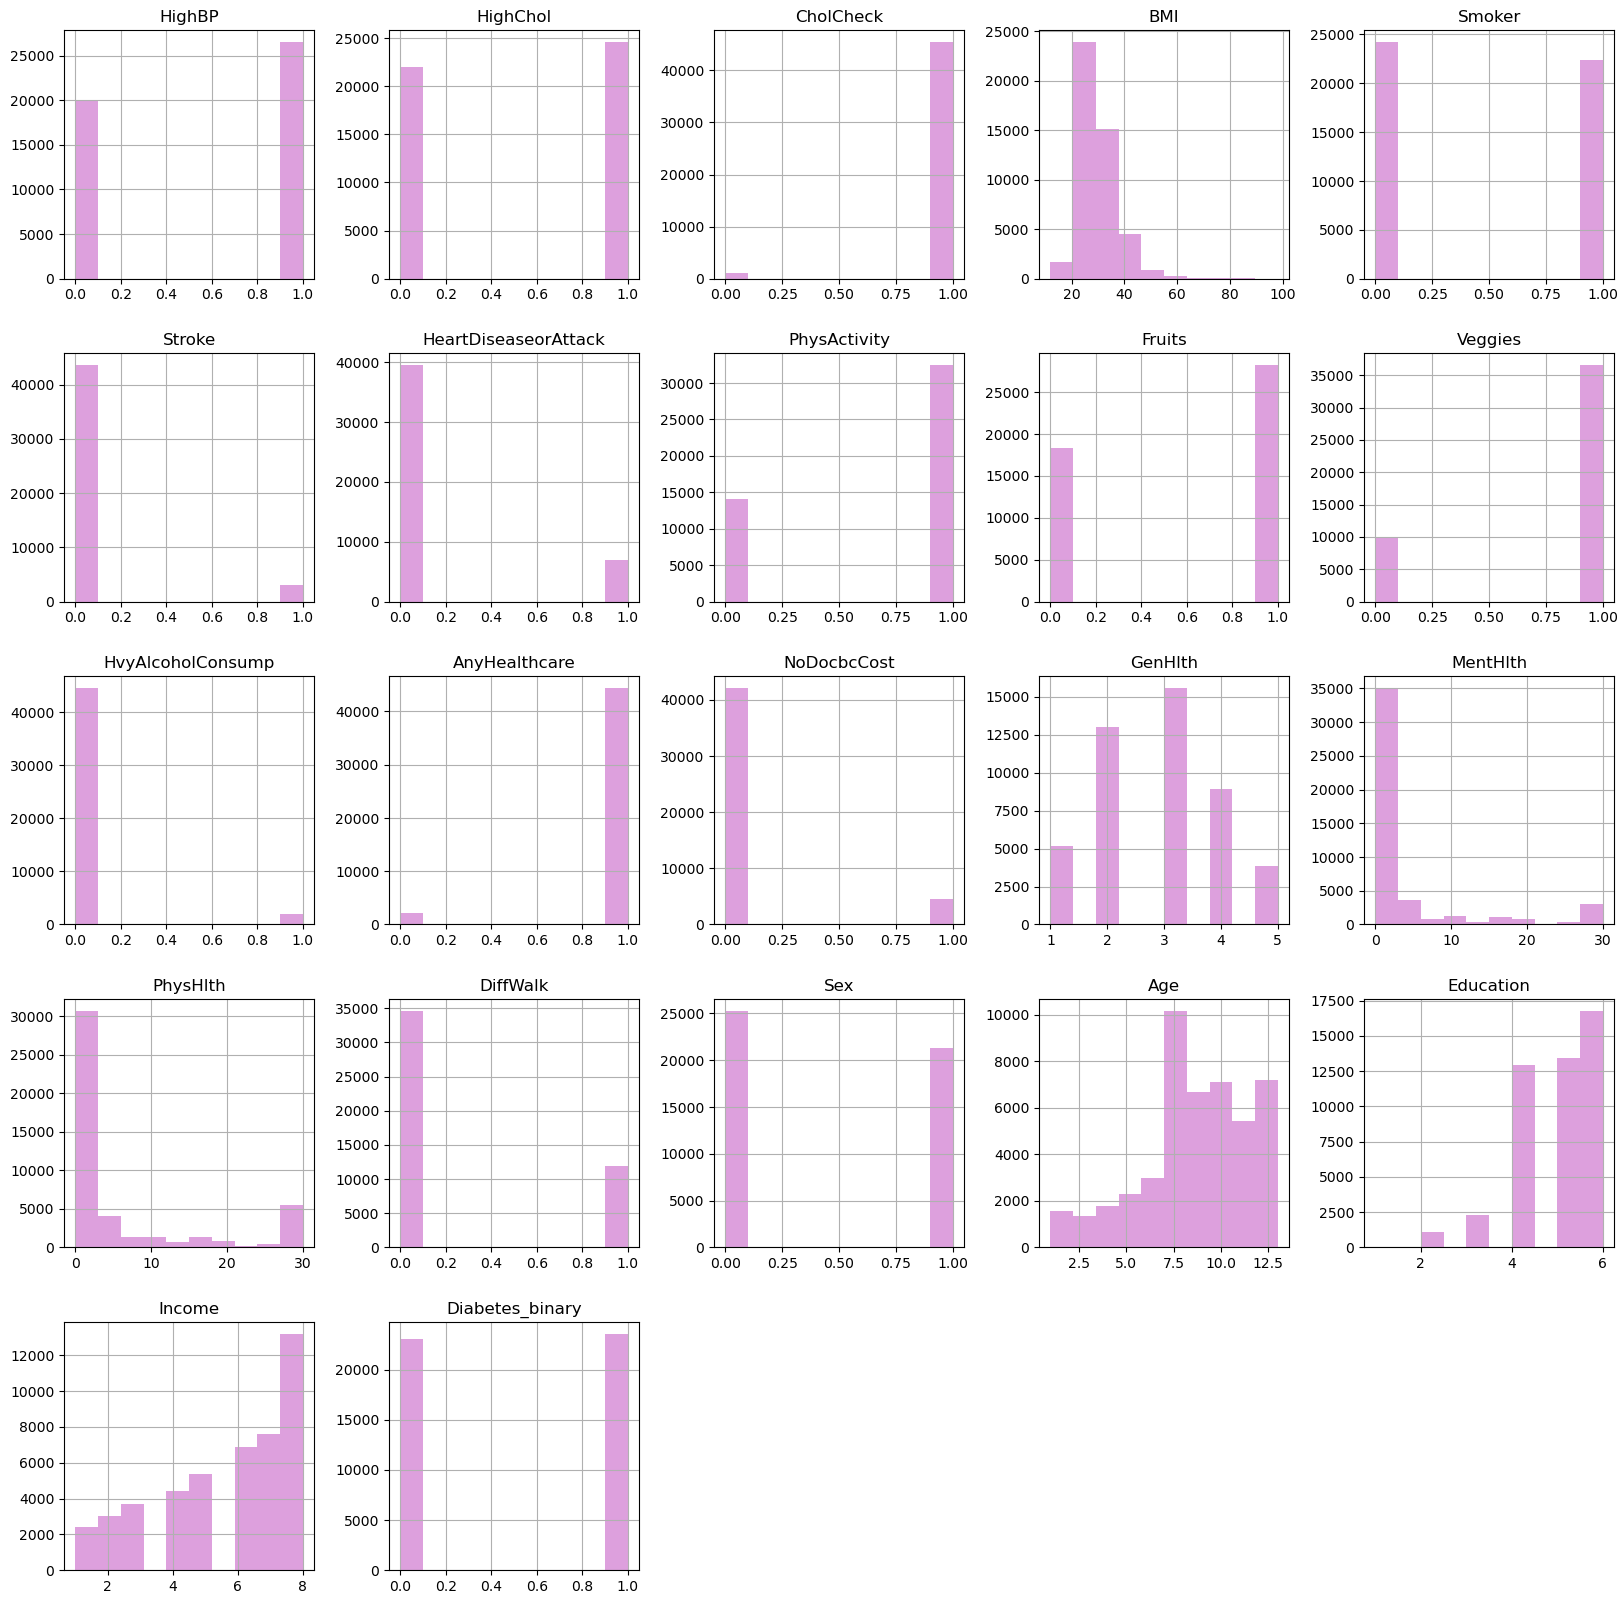

In [18]:
df_train.hist(figsize=(20, 20), color="plum")
plt.show()

# Создаем тест и трейн

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3)
X_train.head(3)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
19569,1.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,2.0,0.0,1.0,13.0,3.0,2.0
7018,0.0,0.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,13.0,6.0,7.0
42973,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,2.0,0.0,0.0,0.0,9.0,4.0,7.0


# Попробуем найти оптимальное количество фич

План такой, что буду пробовать смотреть, какие фичи встречаются в нескольких способах выявления более значимых

In [26]:
model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=75)
model.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=75)

In [27]:
def plot_learning_tree_new(estimator, X_train, X_test, y_train, y_test):

    fig = plt.figure(figsize=(20, 5))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    n_estimators = estimator.n_estimators
    zero = np.zeros(n_estimators, dtype=np.float64)
    color_one = "blue"
    color_two = "red"

    train_score = zero.copy()
    for i, y_pred_train in enumerate(estimator.staged_predict(X_train)):
        train_score[i] = fbeta_score(y_train, y_pred_train, beta=np.sqrt(2))
    ax1.plot(
        np.arange(train_score.shape[0]),
        train_score,
        "-",
        color=color_one,
        label="Train",
    )

    test_score = zero.copy()
    for i, y_pred_test in enumerate(estimator.staged_predict(X_test)):
        test_score[i] = fbeta_score(y_test, y_pred_test, beta=np.sqrt(2))
    ax1.plot(
        np.arange(test_score.shape[0]),
        test_score,
        "-",
        color=color_two,
        label="Test",
    )
    ax1.legend(loc="best")
    ax1.set_title("F-beta Score")
    ax1.set_xlabel("Iteration")
    ax1.set_ylabel("Score")

    train_logloss = zero.copy()
    for i, y_pred_train_proba in enumerate(estimator.staged_predict_proba(X_train)):
        train_logloss[i] = log_loss(y_train, y_pred_train_proba)

    ax2.plot(
        np.arange(train_logloss.shape[0]),
        train_logloss,
        "-",
        color=color_one,
        label="Train",
    )

    test_logloss = zero.copy()
    for i, y_pred_test_proba in enumerate(estimator.staged_predict_proba(X_test)):
        test_logloss[i] = log_loss(y_test, y_pred_test_proba)

    ax2.plot(
        np.arange(test_logloss.shape[0]),
        test_logloss,
        "-",
        color=color_two,
        label="Test",
    )
    ax2.legend(loc="best")
    ax2.set_title("Log Loss")
    ax2.set_xlabel("Iteration")
    ax2.set_ylabel("Log Loss")

    plt.tight_layout()
    plt.show()

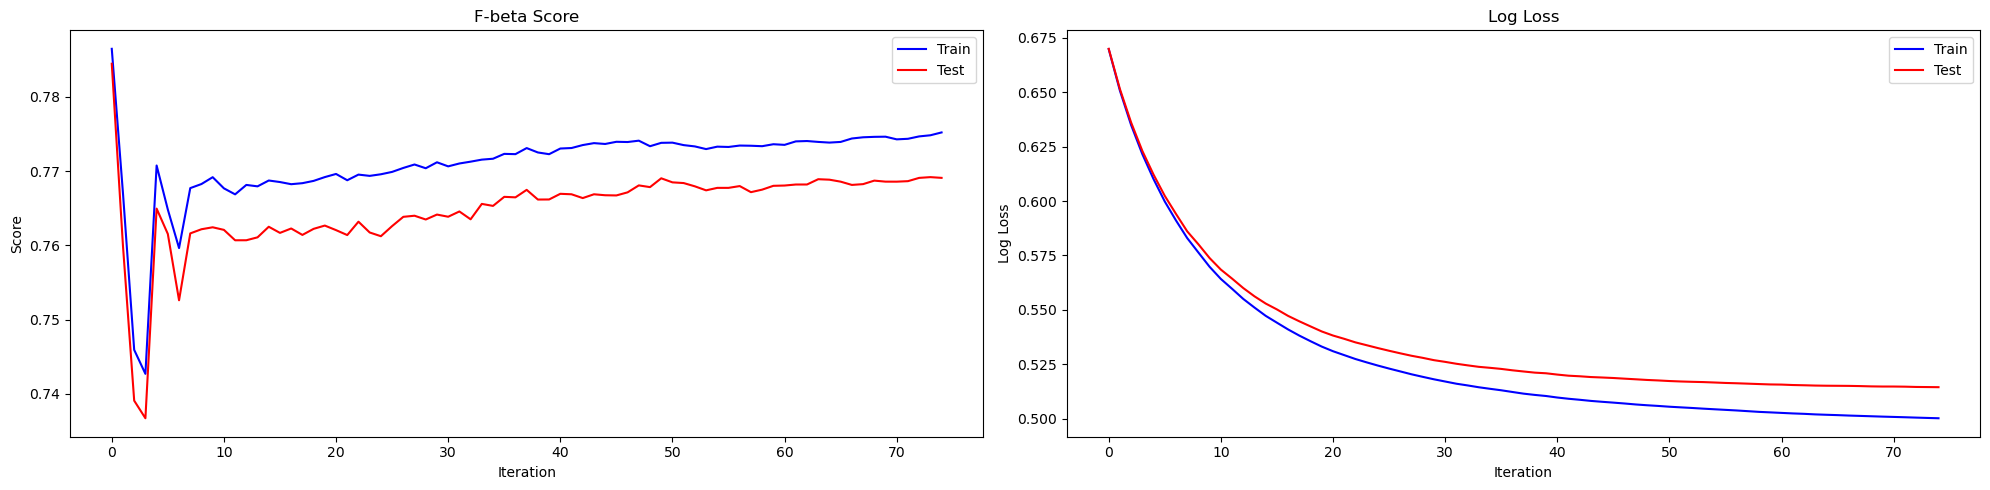

In [28]:
plot_learning_tree_new(model, X_train, X_test, y_train, y_test)

Сначала попробуем добавить шумы и посмотреть, какие изначальные фичи вносят значимый вклад

In [29]:
rng = np.random.RandomState(42)
noise = rng.normal(size=(X_train.shape[0], 21))
X_w_noise = np.hstack([X_train, noise])
print("Новая размероность с учетом шумовых признаков:", X_w_noise.shape)

Новая размероность с учетом шумовых признаков: (32604, 42)


Text(0.5, 0, 'Индекс признака')

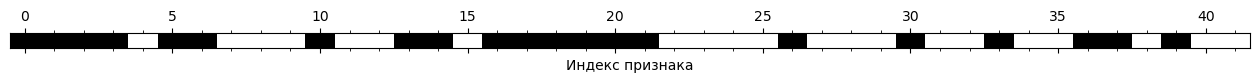

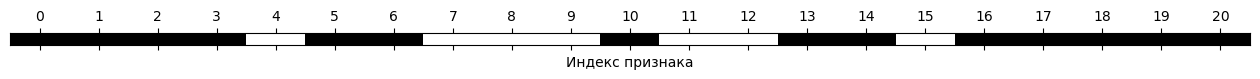

In [32]:
rfe_select = RFE(
    GradientBoostingClassifier(n_estimators=75, learning_rate=0.1),
    n_features_to_select=21,
)

rfe_select.fit(X_w_noise, y_train)

mask = rfe_select.get_support()
plt.matshow(mask.reshape(1, -1), cmap="gray_r", aspect=0.5)
plt.yticks([])
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(1))
plt.xlabel("Индекс признака")

mask = rfe_select.get_support()[:21]
plt.matshow(mask.reshape(1, -1), cmap="gray_r", aspect=0.2)
plt.yticks([])
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.xlabel("Индекс признака")

In [33]:
X.columns[mask]  # названия самых значимых фич

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Stroke',
       'HeartDiseaseorAttack', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth',
       'DiffWalk', 'Sex', 'Age', 'Education', 'Income'],
      dtype='object')

Используем просто график важности признаков

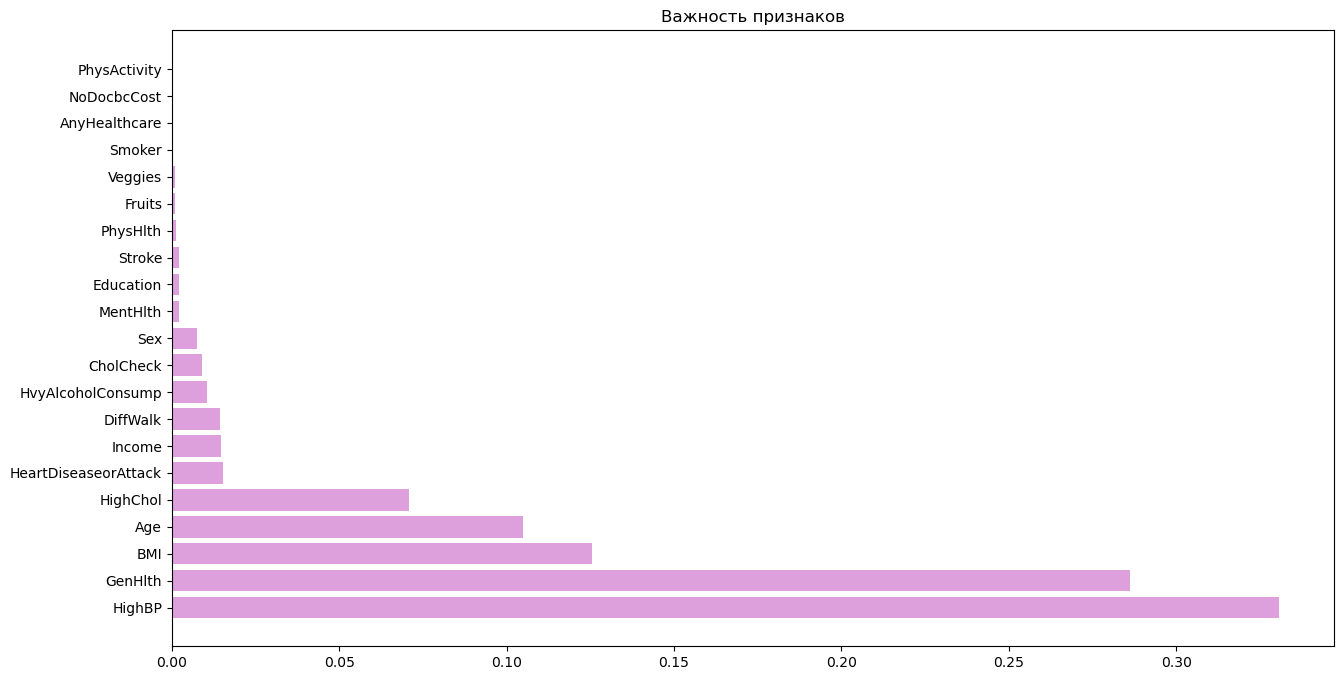

In [ ]:
rfc = GradientBoostingClassifier(n_estimators=75, learning_rate=0.1)
rfc.fit(X_train, y_train)

plt.figure(figsize=(15, 8))
feature_names = np.array(X.columns)

importance = np.sort(rfc.feature_importances_)
importance_name = np.argsort(rfc.feature_importances_)

plt.barh(width=importance, y=feature_names[importance_name], color="plum")
ax = plt.gca()
ax.invert_yaxis()
plt.title("Важность признаков")
plt.show()

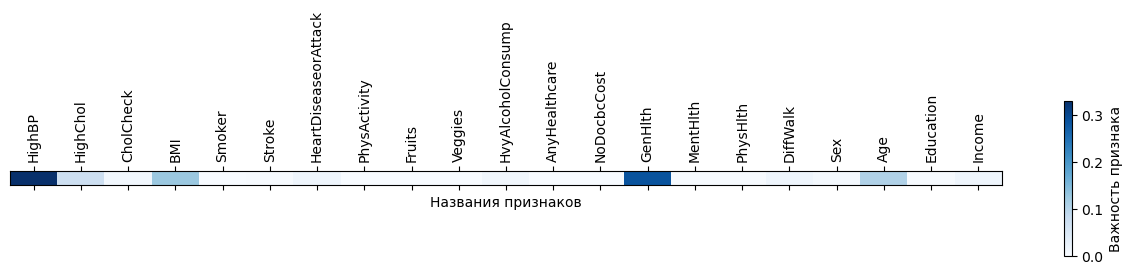

In [35]:
importance = rfc.feature_importances_
feature_names = np.array(X.columns)

mask = importance
plt.matshow(mask.reshape(1, -1), cmap="Blues", aspect=0.3)
plt.yticks([])  # Убираем метки на оси Y
plt.xticks(
    ticks=np.arange(len(feature_names)), labels=X.columns, rotation=90
)  # Устанавливаем названия признаков на оси X
plt.xlabel("Названия признаков")

cbar = plt.colorbar()
cbar.set_label("Важность признака")

plt.show()

Принимаю волевое решение удалить признаки, которые в графике важности идут после "DiffWalk" 

In [36]:
columns_to_remove = [
    "Education",
    "MentHlth",
    "PhysHlth",
    "Stroke",
    "Fruits",
    "Veggies",
    "AnyHealthcare",
    "Smoker",
    "PhysActivity",
    "NoDocbcCost",
]
removing_columns = ColumnTransformer(
    [
        (
            "drop_features",
            "drop",
            columns_to_remove,
        )
    ],
    remainder="passthrough",
    verbose_feature_names_out=False,
    n_jobs=-1,
).set_output(transform="pandas")

In [37]:
removing_columns.fit_transform(X)

,HighBP,HighChol,CholCheck,BMI,HeartDiseaseorAttack,HvyAlcoholConsump,GenHlth,DiffWalk,Sex,Age,Income
0,0.0,0.0,1.0,23.0,1.0,0.0,4.0,0.0,0.0,6.0,3.0
1,1.0,1.0,1.0,35.0,0.0,0.0,4.0,0.0,0.0,10.0,5.0
2,1.0,0.0,1.0,30.0,0.0,0.0,3.0,0.0,0.0,4.0,1.0
3,0.0,0.0,1.0,26.0,0.0,0.0,2.0,0.0,1.0,8.0,7.0
4,0.0,0.0,1.0,36.0,0.0,1.0,3.0,0.0,0.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
47358,1.0,1.0,1.0,27.0,1.0,0.0,2.0,0.0,1.0,13.0,6.0
47359,0.0,1.0,1.0,31.0,0.0,0.0,2.0,0.0,1.0,9.0,8.0
47360,1.0,0.0,1.0,28.0,0.0,0.0,4.0,0.0,0.0,9.0,6.0
47361,0.0,0.0,1.0,25.0,0.0,0.0,2.0,0.0,0.0,5.0,8.0


In [38]:
total_pipeline = Pipeline([("first", removing_columns)])

# Попробуем поискать оптимальные гиперпараметры в случайном лесе

с помощью `BayesSearchCV` — это инструмент из библиотеки scikit-optimize, который используется для автоматической оптимизации гиперпараметров модели с использованием байесовской оптимизации

In [39]:
param_space = {
    "model__n_estimators": Integer(1000, 1200, prior="uniform"),
    "model__min_samples_split": Categorical([2, 5, 10]),
    "model__min_samples_leaf": Categorical([1, 2, 4, 5]),
    "model__criterion": Categorical(["gini", "entropy"]),
    "model__max_features": Categorical([None, "sqrt", "log2"]),
    "model__oob_score": Categorical([True, False]),
}


def f2_score_scorer(estimator, X, y):
    y_pred = estimator.predict(X)
    return fbeta_score(y, y_pred, beta=2 ** (1 / 2))


rf_pipeline = Pipeline(
    [("preprocessing", total_pipeline), ("model", RandomForestClassifier(n_jobs=-1))]
)

opt = BayesSearchCV(
    estimator=rf_pipeline,
    search_spaces=param_space,
    n_iter=50,
    cv=StratifiedShuffleSplit(test_size=0.25, n_splits=5),
    scoring=f2_score_scorer,
    n_jobs=-1,
)

opt.fit(X_train, y_train)

print("Лучшие параметры:", opt.best_params_)

print("Лучшая F2-метрика:", opt.best_score_)

y_pred = opt.best_estimator_.predict(X_test)
test_f2_score = fbeta_score(y_test, y_pred, beta=2 ** (1 / 2))
print("F2-метрика на тестовых данных:", test_f2_score)

Лучшие параметры: OrderedDict([('model__criterion', 'gini'), ('model__max_features', 'sqrt'), ('model__min_samples_leaf', 5), ('model__min_samples_split', 10), ('model__n_estimators', 1000), ('model__oob_score', False)])
Лучшая F2-метрика: 0.7702683899372286
F2-метрика на тестовых данных: 0.7624589266155531


Теперь применим оптимальные параметры на модель

In [40]:
def f2_score_scorer(estimator, X, y):
    y_pred = estimator.predict(X)
    return fbeta_score(y, y_pred, beta=2 ** (1 / 2))


best_params = {
    "criterion": "gini",
    "max_features": "sqrt",
    "min_samples_leaf": 5,
    "min_samples_split": 10,
    "n_estimators": 1000,
    "oob_score": False,
    "n_jobs": -1,
}

rf_model = RandomForestClassifier(**best_params)

final_pipeline = Pipeline([("preprocessing", total_pipeline), ("model", rf_model)])

final_pipeline.fit(X_train, y_train)

train_f2 = f2_score_scorer(final_pipeline, X_train, y_train)
print("F2-метрика на обучающей выборке: {:.3f}".format(train_f2))

test_f2 = f2_score_scorer(final_pipeline, X_test, y_test)
print("F2-метрика на тестовой выборке: {:.3f}".format(test_f2))

F2-метрика на обучающей выборке: 0.813
F2-метрика на тестовой выборке: 0.763


Попробуем еще потюнить порог для принятия решений в лесе

In [41]:
def f2_score_scorer(estimator, X, y):
    y_pred = estimator.predict(X)
    return fbeta_score(y, y_pred, beta=2 ** (1 / 2))


rf_model = final_pipeline.named_steps["model"]
y_proba = rf_model.predict_proba(
    final_pipeline.named_steps["preprocessing"].transform(X_test)
)[:, 1]


def find_optimal_threshold(y_true, y_proba, beta=2 ** (1 / 2)):
    precision, recall, thresholds = precision_recall_curve(y_true, y_proba)
    fbeta_scores = (
        (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)
    )
    fbeta_scores = np.nan_to_num(fbeta_scores)
    best_idx = np.argmax(fbeta_scores)
    return thresholds[best_idx], fbeta_scores[best_idx]


optimal_threshold, best_f2_score = find_optimal_threshold(y_test, y_proba)
print(f"Оптимальный порог: {optimal_threshold:.3f}")
print(f"Лучшая F2-метрика: {best_f2_score:.3f}")

y_pred_adjusted = (y_proba >= optimal_threshold).astype(int)

test_f2_score = fbeta_score(y_test, y_pred_adjusted, beta=2 ** (1 / 2))
print(f"F2-метрика на тестовой выборке с оптимальным порогом: {test_f2_score:.3f}")

Оптимальный порог: 0.279
Лучшая F2-метрика: 0.816
F2-метрика на тестовой выборке с оптимальным порогом: 0.816


Используем найденный оптимальный порог

In [50]:
best_params = {
    "criterion": "gini",
    "max_features": "sqrt",
    "min_samples_leaf": 5,
    "min_samples_split": 10,
    "n_estimators": 1000,
    "oob_score": False,
    "n_jobs": -1,
}

rf_model = RandomForestClassifier(**best_params)
final_pipeline = Pipeline([("preprocessing", total_pipeline), ("model", rf_model)])

final_pipeline.fit(X_train, y_train)

custom_threshold = 0.279
fin_pipline = FixedThresholdClassifier(final_pipeline, threshold=0.279).fit(
    X_train, y_train
)
f2_test = fbeta_score(y_test, fin_pipline.predict(X_test), beta=2 ** (1 / 2))
print(f"F2-метрика на тестовой выборке с порогом {custom_threshold}: {f2_test:.3f}")

F2-метрика на тестовой выборке с порогом 0.279: 0.816


In [44]:
y_pred_RFCl = fin_pipline.predict(X_test)

In [45]:
y_pred_RFCl

array([1., 1., 0., ..., 1., 0., 1.])

<function matplotlib.pyplot.show(close=None, block=None)>

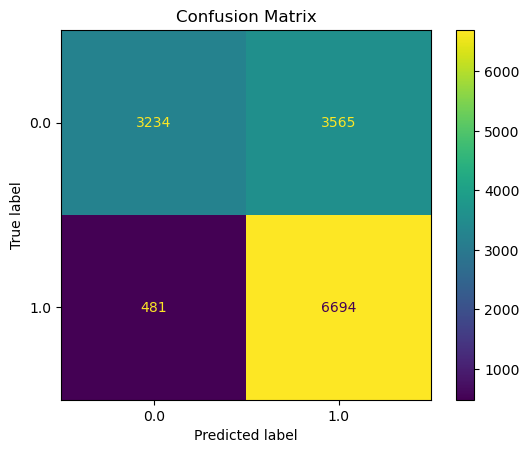

In [46]:
cm_RF = confusion_matrix(y_test, y_pred_RFCl)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_RF, display_labels=model.classes_)
disp.plot(cmap="viridis", values_format="d")

plt.title("Confusion Matrix")
plt.show

In [ ]:
# #ЛУЧШИМИ ПАРАМЕТРАМИ ОКАЗАЛИСЬ ПАРАМЕТРЫ ИЗ ВОТ ЭТОЙ ЧАСТИ! при них метрика у меня была лучше, так что в тест их вставлю
# best_params = {
#     "criterion": "entropy",
#     "max_features": "sqrt",
#     "min_samples_leaf": 5,
#     "min_samples_split": 2,
#     "n_estimators": 1001,
#     "oob_score": True,
#     "n_jobs": -1,
# }

# rf_model = RandomForestClassifier(**best_params)
# final_pipeline = Pipeline([("preprocessing", total_pipeline), ("model", rf_model)])

# final_pipeline.fit(X_train, y_train)

# custom_threshold = 0.281
# fin_pipline = FixedThresholdClassifier(final_pipeline, threshold=0.281).fit(
#     X_train, y_train
# )
# f2_test = fbeta_score(y_test, fin_pipline.predict(X_test), beta=2 ** (1 / 2))
# print(f"F2-метрика на тестовой выборке с порогом {custom_threshold}: {f2_test:.3f}")

F2-метрика на тестовой выборке с порогом 0.281: 0.817


# Теперь рассмотрим градиентный бустинг

In [48]:
param_space_GB = {
    "model__n_estimators": Integer(100, 1500),
    "model__learning_rate": Real(0.01, 0.3, prior="uniform"),
    "model__max_depth": Integer(3, 10),
    "model__min_samples_leaf": Integer(1, 10),
    "model__loss": Categorical(["log_loss", "exponential"]),
    "model__criterion": Categorical(["friedman_mse", "squared_error"]),
    "model__max_features": Categorical(["sqrt", "log2", None]),
}


def f2_score_scorer(estimator, X, y):
    y_pred = estimator.predict(X)
    return fbeta_score(y, y_pred, beta=2 ** (1 / 2))


gb_pipeline = Pipeline(
    [("preprocessing", total_pipeline), ("model", GradientBoostingClassifier())]
)

opt_gb = BayesSearchCV(
    estimator=gb_pipeline,
    search_spaces=param_space_GB,
    n_iter=50,
    cv=StratifiedShuffleSplit(test_size=0.25, n_splits=5),
    scoring=f2_score_scorer,
    n_jobs=-1,
)

opt_gb.fit(X_train, y_train)

print("Лучшие параметры:", opt_gb.best_params_)

print("Лучшая F2-метрика:", opt_gb.best_score_)

y_pred_GB = opt_gb.best_estimator_.predict(X_test)
test_f2_score_GB = fbeta_score(y_test, y_pred_GB, beta=2 ** (1 / 2))
print("F2-метрика на тестовых данных:", test_f2_score_GB)

/Users/annavasilenko/Applications/anaconda3/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['squared_error', 0.01, 'exponential', 3, 'sqrt', 1, 1500] before, using random point ['squared_error', 0.026469827771679937, 'log_loss', 6, 'sqrt', 2, 372]
  warnings.warn(


Лучшие параметры: OrderedDict([('model__criterion', 'squared_error'), ('model__learning_rate', 0.01), ('model__loss', 'exponential'), ('model__max_depth', 3), ('model__max_features', 'sqrt'), ('model__min_samples_leaf', 1), ('model__n_estimators', 1318)])
Лучшая F2-метрика: 0.7766971697589867
F2-метрика на тестовых данных: 0.7678887828812867


Применим наши лучшие параметры в модели

In [49]:
best_params_GB = {
    "criterion": "squared_error",
    "learning_rate": 0.01,
    "loss": "exponential",
    "max_depth": 3,
    "max_features": "sqrt",
    "min_samples_leaf": 1,
    "n_estimators": 1318,
}

gb_model = GradientBoostingClassifier(**best_params_GB)

final_pipeline_GB = Pipeline([("preprocessing", total_pipeline), ("model", gb_model)])

final_pipeline_GB.fit(X_train, y_train)


def f2_score_scorer(estimator, X, y):
    y_pred = estimator.predict(X)
    return fbeta_score(y, y_pred, beta=2 ** (1 / 2))


train_f2_GB = f2_score_scorer(final_pipeline_GB, X_train, y_train)
print("F2-метрика на обучающей выборке: {:.3f}".format(train_f2_GB))

test_f2_GB = f2_score_scorer(final_pipeline_GB, X_test, y_test)
print("F2-метрика на тестовой выборке: {:.3f}".format(test_f2_GB))

F2-метрика на обучающей выборке: 0.776
F2-метрика на тестовой выборке: 0.768


Еще раз применим поиск порога

In [51]:
def f2_score_scorer(estimator, X, y):
    y_pred = estimator.predict(X)
    return fbeta_score(y, y_pred, beta=2 ** (1 / 2))


final_pipeline_GB.fit(X_train, y_train)

gb_model_tun = final_pipeline_GB.named_steps["model"]
y_proba_GB = gb_model_tun.predict_proba(
    final_pipeline_GB.named_steps["preprocessing"].transform(X_test)
)[:, 1]


def find_optimal_threshold(y_true, y_proba, beta=2 ** (1 / 2)):
    precision, recall, thresholds = precision_recall_curve(y_true, y_proba)
    fbeta_scores = (
        (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)
    )
    fbeta_scores = np.nan_to_num(fbeta_scores)
    best_idx = np.argmax(fbeta_scores)
    return thresholds[best_idx], fbeta_scores[best_idx]


optimal_threshold_GB, best_f2_score_GB = find_optimal_threshold(y_test, y_proba_GB)
print(f"Оптимальный порог: {optimal_threshold_GB:.3f}")
print(f"Лучшая F2-метрика: {best_f2_score_GB:.3f}")

y_pred_adjusted_GB = (y_proba_GB >= optimal_threshold_GB).astype(int)

test_f2_score_tun_GB = fbeta_score(y_test, y_pred_adjusted_GB, beta=2 ** (1 / 2))
print(
    f"F2-метрика на тестовой выборке с оптимальным порогом: {test_f2_score_tun_GB:.3f}"
)

Оптимальный порог: 0.279
Лучшая F2-метрика: 0.820
F2-метрика на тестовой выборке с оптимальным порогом: 0.820


In [52]:
best_params_GB = {
    "criterion": "squared_error",
    "learning_rate": 0.01,
    "loss": "exponential",
    "max_depth": 3,
    "max_features": "sqrt",
    "min_samples_leaf": 1,
    "n_estimators": 1318,
}

gb_model = GradientBoostingClassifier(**best_params_GB)
final_pipeline_GB = Pipeline([("preprocessing", total_pipeline), ("model", gb_model)])

final_pipeline_GB.fit(X_train, y_train)

custom_threshold_GB = 0.279
fin_pipline_GB = FixedThresholdClassifier(final_pipeline_GB, threshold=0.279).fit(
    X_train, y_train
)
f2_test_GB = fbeta_score(y_test, fin_pipline_GB.predict(X_test), beta=2 ** (1 / 2))
print(
    f"F2-метрика на тестовой выборке с порогом {custom_threshold_GB}: {f2_test_GB:.3f}"
)

F2-метрика на тестовой выборке с порогом 0.279: 0.820


In [53]:
y_pred_GB = fin_pipline_GB.predict(X_test)

In [54]:
y_pred_GB

array([1., 1., 0., ..., 1., 0., 1.])

<function matplotlib.pyplot.show(close=None, block=None)>

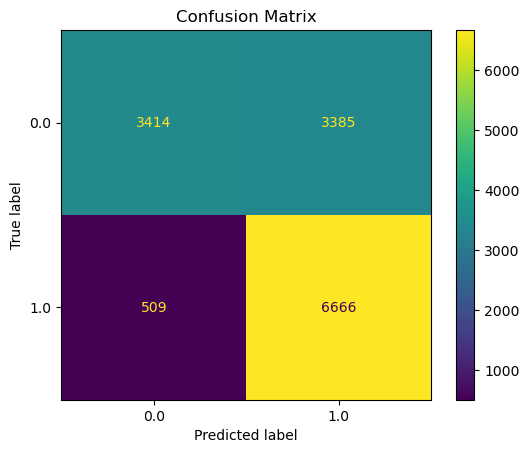

In [55]:
cm_GB = confusion_matrix(y_test, y_pred_GB)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_GB, display_labels=model.classes_)
disp.plot(cmap="viridis", values_format="d")

plt.title("Confusion Matrix")
plt.show

In [ ]:
# best_params_GB = {
#     "criterion": "squared_error",
#     "learning_rate": 0.20098994958682292,
#     "loss": "exponential",
#     "max_depth": 3,
#     "max_features": "log2",
#     "min_samples_leaf": 10,
#     "n_estimators": 454,
# }


# gb_model = GradientBoostingClassifier(**best_params_GB)
# final_pipeline_GB = Pipeline([("preprocessing", total_pipeline), ("model", gb_model)])

# final_pipeline_GB.fit(X_train, y_train)

# custom_threshold_GB = 0.265
# fin_pipline_GB = FixedThresholdClassifier(final_pipeline_GB, threshold=0.265).fit(
#     X_train, y_train
# )
# f2_test_GB = fbeta_score(y_test, fin_pipline_GB.predict(X_test), beta=2 ** (1 / 2))
# print(
#     f"F2-метрика на тестовой выборке с порогом {custom_threshold_GB}: {f2_test_GB:.3f}")

F2-метрика на тестовой выборке с порогом 0.265: 0.817


# Попробуем посовмещать модели

**Спойлер: у меня получилось хуже, чем в моделях по отдельности**

In [55]:
voting_clf = VotingClassifier(
    estimators=[
        ("rf", fin_pipline),
        ("gb", fin_pipline_GB),
        ("gb2", fin_pipline_GB),
        ("gb3", fin_pipline_GB),
        ("gb4", fin_pipline_GB),
        ("gb5", fin_pipline_GB),
    ],
    voting="soft",
)

voting_clf.fit(X_train, y_train)

y_pred_voiting = voting_clf.predict(X_test)

f2_score_voiting = fbeta_score(
    y_test, y_pred_voiting, beta=2 ** (1 / 2), average="weighted"
)

print(f"F2-метрика на тестовых данных: {f2_score_voiting:.3f}")

F2-метрика на тестовых данных: 0.749


In [56]:
e_s_clf = StackingClassifier(
    estimators=[("rf", fin_pipline), ("gb", fin_pipline_GB)],
    final_estimator=LogisticRegression(max_iter=1000),
    stack_method="predict_proba",
)

e_s_clf.fit(X, y)

y_pred_sc = e_s_clf.predict(X_test)

f2_score_sc = fbeta_score(y_test, y_pred_sc, beta=2 ** (1 / 2), average="weighted")

print(f"F2-метрика на тестовых данных: {f2_score_sc:.3f}")

F2-метрика на тестовых данных: 0.760


In [57]:
e_s_clf = StackingClassifier(
    estimators=[
        ("rf", fin_pipline),
        ("gb", fin_pipline_GB),
        ("gb2", fin_pipline_GB),
        ("gb3", fin_pipline_GB),
    ],
    final_estimator=LogisticRegression(max_iter=1000),
    stack_method="predict_proba",
)

e_s_clf.fit(X, y)

y_pred_sc = e_s_clf.predict(X_test)

f2_score_sc = fbeta_score(y_test, y_pred_sc, beta=2 ** (1 / 2), average="weighted")

print(f"F2-метрика на тестовых данных: {f2_score_sc:.3f}")

F2-метрика на тестовых данных: 0.759


# Попробуем рассмотреть SVC

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3)
X_train.head(3)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
33902,1.0,1.0,1.0,27.0,0.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,3.0,0.0,10.0,0.0,0.0,12.0,6.0,8.0
9612,0.0,0.0,1.0,22.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,6.0,8.0
6224,0.0,0.0,1.0,33.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,8.0,5.0,6.0


In [ ]:
f2_scorer = make_scorer(fbeta_score, beta=2 ** (1 / 2))
scaling = [MinMaxScaler(), StandardScaler(), RobustScaler()]
cv = StratifiedKFold(n_splits=5)

pipe_svm = Pipeline(
    [
        ("preprocessing", total_pipeline),
        ("scaling", StandardScaler()),
        ("classifier", svm.SVC()),
    ]
)

C = np.linspace(0.2, 2, 10)
gamma = np.linspace(0.001, 0.2, 10)
kernals = ["linear", "poly", "rbf", "sigmoid"]

param_grid = [
    {
        "scaling": scaling,
        "classifier__C": C,
        "classifier__gamma": gamma,
        "classifier__kernel": kernals,
    }
]

grid_svm = HalvingGridSearchCV(
    pipe_svm,
    param_grid,
    cv=cv,
    scoring=f2_scorer,
    return_train_score=True,
    n_jobs=-1,
    verbose=1,
)
grid_svm.fit(X_train, y_train)

n_iterations: 7
n_required_iterations: 7
n_possible_iterations: 7
min_resources_: 44
max_resources_: 32468
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 1200
n_resources: 44
Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
----------
iter: 1
n_candidates: 400
n_resources: 132
Fitting 5 folds for each of 400 candidates, totalling 2000 fits
----------
iter: 2
n_candidates: 134
n_resources: 396
Fitting 5 folds for each of 134 candidates, totalling 670 fits
----------
iter: 3
n_candidates: 45
n_resources: 1188
Fitting 5 folds for each of 45 candidates, totalling 225 fits
----------
iter: 4
n_candidates: 15
n_resources: 3564
Fitting 5 folds for each of 15 candidates, totalling 75 fits
----------
iter: 5
n_candidates: 5
n_resources: 10692
Fitting 5 folds for each of 5 candidates, totalling 25 fits
----------
iter: 6
n_candidates: 2
n_resources: 32076
Fitting 5 folds for each of 2 candidates, totalling 10 fits


/Users/annavasilenko/Applications/anaconda3/lib/python3.11/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


HalvingGridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                    estimator=Pipeline(steps=[('preprocessing',
                                               Pipeline(steps=[('first',
                                                                ColumnTransformer(n_jobs=-1,
                                                                                  remainder='passthrough',
                                                                                  transformers=[('drop_features',
                                                                                                 'drop',
                                                                                                 ['Education',
                                                                                                  'MentHlth',
                                                                                                  'PhysHlth',
                                                                                                  'Stroke',
                                                                                                  'Fruits',
                                                                                                  'Veggies',
                                                                                                  'AnyHealthcare',
                                                                                                  'Smoker',
                                                                                                  'PhysActivity',
                                                                                                  'NoDoc...
                    param_grid=[{'classifier__C': array([0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
                                 'classifier__gamma': array([0.001     , 0.02311111, 0.04522222, 0.06733333, 0.08944444,
       0.11155556, 0.13366667, 0.15577778, 0.17788889, 0.2       ]),
                                 'classifier__kernel': ['linear', 'poly', 'rbf',
                                                        'sigmoid'],
                                 'scaling': [MinMaxScaler(), StandardScaler(),
                                             RobustScaler()]}],
                    scoring=make_scorer(fbeta_score, response_method='predict', beta=1.4142135623730951),
                    verbose=1)

In [136]:
grid_result_svm = (
    pd.DataFrame(grid_svm.cv_results_)
    .sort_values(["rank_test_score", "std_test_score"])
    .T
)
grid_result_svm

,1078,1800,1030,1799,1796,1797,1798,1650,1648,1727,...,101,113,209,317,425,545,665,893,1013,1133
iter,0,6,0,6,5,5,5,2,2,2,...,0,0,0,0,0,0,0,0,0,0
n_resources,44,32076,44,32076,10692,10692,10692,396,396,396,...,44,44,44,44,44,44,44,44,44,44
mean_fit_time,0.003957,54.666316,0.006636,57.180068,5.59336,4.67477,4.988121,0.01574,0.015302,0.007766,...,0.006707,0.009075,0.011849,0.005369,0.006199,0.003913,0.005633,0.007717,0.007392,0.00631
std_fit_time,0.001616,6.529619,0.002006,6.913711,0.442104,0.677269,0.542192,0.003115,0.002636,0.000885,...,0.001108,0.006319,0.00304,0.001231,0.001144,0.000239,0.000529,0.001432,0.000881,0.003031
mean_score_time,0.00325,12.83962,0.008449,15.121246,1.57435,1.376348,1.42437,0.006508,0.01053,0.003292,...,0.0056,0.004272,0.007384,0.003197,0.007809,0.002752,0.004565,0.006226,0.005499,0.003652
std_score_time,0.001634,3.656342,0.004006,1.798055,0.076027,0.113192,0.148045,0.001373,0.003131,0.000234,...,0.001125,0.002371,0.001141,0.000548,0.0058,0.00017,0.000797,0.002704,0.001226,0.000819
param_classifier__C,1.8,1.0,1.8,1.4,1.0,1.4,1.2,1.6,1.4,1.6,...,0.2,0.2,0.4,0.6,0.8,1.0,1.2,1.6,1.8,2.0
param_classifier__gamma,0.2,0.023111,0.111556,0.023111,0.023111,0.023111,0.023111,0.023111,0.023111,0.2,...,0.177889,0.2,0.155778,0.133667,0.111556,0.111556,0.111556,0.089444,0.089444,0.089444
param_classifier__kernel,sigmoid,rbf,sigmoid,rbf,rbf,rbf,rbf,sigmoid,sigmoid,sigmoid,...,poly,poly,poly,poly,poly,poly,poly,poly,poly,poly
param_scaling,StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),MinMaxScaler(),...,RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler()


In [137]:
pipe_best_svm = make_pipeline(
    StandardScaler(), svm.SVC(C=1.0, gamma=0.023111, kernel="rbf")
)
pipe_best_svm.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma=0.023111))])

In [138]:
fbeta_score(
    y_test, pipe_best_svm.predict(X_test), beta=2 ** (1 / 2), average="weighted"
)

0.7479617337611456

In [142]:
cv_scores = ["train_score", "test_score"]

f2_scorer = make_scorer(fbeta_score, beta=2 ** (1 / 2))

cv = StratifiedKFold(n_splits=5)
cv_results_model_origin_svm = pd.DataFrame(
    cross_validate(
        pipe_best_svm,
        X_train,
        y_train,
        scoring=f2_scorer,
        cv=cv,
        return_train_score=True,
        return_estimator=True,
        n_jobs=-1,
    )
)
cv_results_model_origin_svm[cv_scores].agg(["mean", "std"]).T

,mean,std
train_score,0.794126,0.001292
test_score,0.784211,0.003850


In [ ]:
model_tuned_svm = TunedThresholdClassifierCV(estimator=pipe_best_svm, scoring=f2_scorer)

cv_results_model_tuned_svm = pd.DataFrame(
    cross_validate(
        model_tuned_svm,
        X_train,
        y_train,
        scoring=f2_scorer,
        cv=cv,
        return_train_score=True,
        return_estimator=True,
        n_jobs=-1,
    )
)
cv_results_model_tuned_svm[cv_scores].agg(["mean", "std"]).T

,mean,std
train_score,0.822135,0.000865
test_score,0.816414,0.003414


In [ ]:
ths_final_svm = {
    "origin": 0.5,
    "mode": x_plt[np.argmax(y_plt)],
    "median": decision_threshold_svm.median(),
    "mean": decision_threshold_svm.mean(),
}
comparison_svm = pd.DataFrame()
for key in ths_final_svm:
    final_tune_svm = FixedThresholdClassifier(
        pipe_best_svm, threshold=ths_final_svm[key]
    ).fit(X_train, y_train)
    comparison_svm.loc[key, "train"] = fbeta_score(
        y_train, pipe_best_svm.predict(X_train), beta=2 ** (1 / 2), average="weighted"
    )
    comparison_svm.loc[key, "test"] = fbeta_score(
        y_test, pipe_best_svm.predict(X_test), beta=2 ** (1 / 2), average="weighted"
    )

comparison_svm.sort_values(by="test")

,train,test
origin,0.759018,0.747962
mode,0.759018,0.747962
median,0.759018,0.747962
mean,0.759018,0.747962


При любом раскладе хуже леса и бустинга, подкачал